### Podatkovno rudarjenje, koda za vmesno poročilo o opravljenem delu, 12. 4. 2018

# Priprava podatkov in osnovna vizualizacija

**Nejc Prijatelj**

**Žan Pristopec**

**Miha Štravs**

V tem notebook-u bomo pisali kodo za obdelavo podatkov, iz katerih bomo s pomočjo pythona, statistike in vizualizacije poiskusili odgovoriti na čim več vprašanj, ki smo si jih zastavili pri izbiri projekta.

## Podatki

Kratek opis podatkov je bil podan že pri osnutku projekta, tu pa bi si najprej na hitro pogledali kaj točno dani podatki vsebujejo. Link do podatkov(https://www.kaggle.com/datasnaek/youtube-new/data).

Vse podatke ki smo jih dobili s spletne strani Kaggle hranimo v diretktoriju "data" in so sledeči:

* *CAvideos.csv:* podatki o trendih videih za Kanado,
* *DEvideos.csv:* podatki o trendih videih za Nemčijo,
* *FRvideos.csv:* podatki o trendih videih za Francijo,
* *GBvideos.csv:* podatki o trendih videih za Veliko Britanijo,
* *USvideos.csv:* podatki o trendih videih za Združene Države,

Vsak podatek v tej zbirki ima naslednje atribute:
* *video_id:* je kar link do videa, in je za vsak vnesen podatek unikaten.
* *trending_date:* datum, katerega je bil video trending.
* *title:* naslov videa.
* *channel_title:* ime youtube kanala ki je video naložil na youtube.
* *category_id:* id kategorije v katero spada video.
* *publish_time:* kdaj je bil video naložen.
* *tags:* ključne besede ki opisujejo video.
* *views:* število ogledov.
* *likes:* število pozitivnih odzivov.
* *dislikes:* število negativnih odzivov.
* *comment_count:* število komentarjev.
* *thumbnail_link:* link do thumbnaila.
* *comments_disabled:* onemogočeni komentarji(true/false).
* *ratings_disabled:* onemogočen odziv na video(true/false).
* *video_error_or_removed:* če je bil video odstranjen(true/false).
* *description:* opis.

Poleg petih že naštetih csv datotek pa podatkovna zbirka vsebuje še pet json datotek, v katerih je podrobneje opisan atribut *category_id* za vsako regijo. Na kratko povedano nam pove kaj pomeni naprimer category_id = 10 &rarr; "music".


### Pridobivanje podatkov

Najprej smo vse podatke prebrali v panda data frame s spodaj napisano funkcijo, in v vsaki tabeli spremenili datume tako, da so bolj po našem okusu.

In [23]:
import numpy as np
import pandas as pan
from datetime import datetime
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import math


matplotlib.__version__

def trans_time(date):
    return datetime.strptime(date, '%y.%d.%m').strftime('%d.%m.%y')

def read_table(file_name):
    data = pan.read_csv(file_name, sep=',')
    return data

'2.1.2'

In [43]:
CA_data = read_table("data/CAvideos.csv")
DE_data = read_table("data/DEvideos.csv")
FR_data = read_table("data/FRvideos.csv")
GB_data = read_table("data/GBvideos.csv")
US_data = read_table("data/USvideos.csv")

CA_data["trending_date"] = CA_data["trending_date"].apply(trans_time)
DE_data["trending_date"] = DE_data["trending_date"].apply(trans_time)
GB_data["trending_date"] = GB_data["trending_date"].apply(trans_time)
US_data["trending_date"] = US_data["trending_date"].apply(trans_time)
FR_data["trending_date"] = FR_data["trending_date"].apply(trans_time)

## Vprašanja

Glavni namen podatkovnega rudarjenja je *odkrivanje znanj iz podatkov*,
torej odgovarjanje na vprašanja z uporabo računskih postopkov.

Z uporabo principov, ki ste jih spoznali na vajah in predavanjih, odgovorite na
spodnja vprašanja. Pri vsakem vprašanju dobro premislite, na kakšen način boste
najbolje podali, prikazali oz. utemeljili odgovor. Bistven del so odgovori na
vprašanja in ne implementacija vaše rešitve.

### 1. vprašanje (15%):
Kateri filmi so v povprečju najbolje ocenjeni?  Pripravite seznam
filmov ter njihovih povprečnih ocen in izpišite po 10 filmov z vrha seznama.
Opazite pri takem ocenjevanju kakšno težavo? Kako bi jo lahko rešili? Kakšni so
rezultati tedaj?

In [44]:
FR_data.head(10)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Ro6eob0LrCY,17.14.11,Malika LePen : Femme de Gauche - Trailer,Le Raptor Dissident,24,2017-11-13T17:32:55.000Z,"Raptor|""Dissident""|""Expliquez""|""moi""|""cette""|""...",212702,29282,1108,3817.0,https://i.ytimg.com/vi/Ro6eob0LrCY/default.jpg,False,False,False,Dimanche.\n18h30.\nSoyez présents pour la vidé...
1,Yo84eqYwP98,17.14.11,"LA PIRE PARTIE ft Le Rire Jaune, Pierre Croce,...",Le Labo,24,2017-11-12T15:00:02.000Z,[none],432721,14053,576,1161.0,https://i.ytimg.com/vi/Yo84eqYwP98/default.jpg,False,False,False,Le jeu de société: https://goo.gl/hhG1Ta\n\nGa...
2,ceqntSXE-10,17.14.11,DESSINS ANIMÉS FRANÇAIS VS RUSSES 2 - Daniil...,Daniil le Russe,23,2017-11-13T17:00:38.000Z,"cartoon|""pokémon""|""école""|""ours""|""мультфильм""",482153,76203,477,9580.0,https://i.ytimg.com/vi/ceqntSXE-10/default.jpg,False,False,False,Une nouvelle dose de dessins animés français e...
3,WuTFI5qftCE,17.14.11,PAPY GRENIER - METAL GEAR SOLID,Joueur Du Grenier,20,2017-11-12T17:00:02.000Z,"Papy grenier|""Metal Gear Solid""|""PS1""|""Tirage ...",925222,85016,550,4303.0,https://i.ytimg.com/vi/WuTFI5qftCE/default.jpg,False,False,False,"Nouvel ,épisode de Papy Grenier ! Ce mois-ci o..."
4,ee6OFs8TdEg,17.14.11,QUI SAUTERA LE PLUS HAUT ? (VÉLO SKATE ROLLER ...,Aurelien Fontenoy,17,2017-11-13T16:30:03.000Z,"vélo|""vtt""|""bmx""|""freestyle""|""bike""|""mtb""|""dir...",141695,8091,72,481.0,https://i.ytimg.com/vi/ee6OFs8TdEg/default.jpg,False,False,False,Sauts à plus de 4 mètres de haut dans un tramp...
5,teXaL6GdQRk,17.14.11,STRANGER JOKES : Jokes de Papa avec les teens ...,"Le Jeu, C'est Sérieux",23,2017-11-13T15:48:57.000Z,"Stranger Jokes|""Jokes de Papa""|""Stranger Thing...",141253,14354,202,417.0,https://i.ytimg.com/vi/teXaL6GdQRk/default.jpg,False,False,False,Contenu commandité par Netflix France.\nInspir...
6,nduL7G_gJoY,17.14.11,De retour dans le Manoir hanté avec le Grand J...,silent jill,24,2017-11-12T19:00:08.000Z,"fantome|""esprits""|""spiritisme""|""hanté""|""ouija""...",187654,9286,1381,2419.0,https://i.ytimg.com/vi/nduL7G_gJoY/default.jpg,False,False,False,"Bonsoir à tous, \nJe tenais beaucoup à retourn..."
7,QmpWE_SODZA,17.14.11,"T'es qui toi ? Squeezie, le youtubeur aux 4 mi...",Salut les terriens !,24,2017-11-13T17:30:01.000Z,"salut les terriens|""squeezie""|""jeux videos""|""i...",91051,1674,1903,701.0,https://i.ytimg.com/vi/QmpWE_SODZA/default.jpg,False,False,False,"Dans Salut Les Terriens, Thierry Ardisson, reç..."
8,GBVxEpQr8R8,17.14.11,ON VOUS DÉVOILE NOTRE VRAI SALAIRE,Mcfly & Carlito,24,2017-11-12T08:59:25.000Z,"mcfly|""carlito""|""golden moustache""|""fatshow""|""...",2340941,200598,6018,7575.0,https://i.ytimg.com/vi/GBVxEpQr8R8/default.jpg,False,False,False,Nouvelle vidéo tous les dimanches matins 10h. ...
9,0RFhWyM6qbA,17.14.11,Benzema balance ses dur vérités Deschamps et L...,HALIRIPA,22,2017-11-12T20:16:45.000Z,"Karim benzema football|""Benzema vs cristiano r...",635236,5945,722,1483.0,https://i.ytimg.com/vi/0RFhWyM6qbA/default.jpg,False,False,False,Abonnez-vous et partagez au max la famille


Odgovor: Seznam najbolje ocenjenih filmov je v zgornji tabeli. Takoj je razvidno da prva tabela ni pravilna saj je nemogoče da bi imeli filmi povprečno oceno 5.0. Po razmisleku sem ugotovil da problem nastane pri filmih ki imajo majhno stevilo ocen saj tako dobimo na vrhu lestvice filme ki imajo le eno ocena in je ta 5.0 kar pa seveda ni relevanten podatek. Izpis izboljsamo tako da izpisemo le tiste filme ki imajo vec kot npr. 10 ocen.

### 2. vprašanje (15%):
Posamezni film pripada enemu ali več žanrom. 
Koliko je vseh žanrov? Prikaži porazdelitev žanrov z uporabo ustrezne
vizualizacije.

stevilo razlicnih zanrov: 19


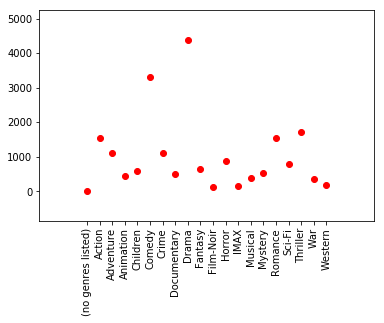

In [90]:
b = pan.DataFrame(movies_data.genres.str.split('|').tolist(), index=movies_data.movieId).stack()
b = b.reset_index()[[0, 'movieId']]
b.columns = ['genres', 'count']
grouped = b.groupby("genres", as_index=False)
grouped = grouped.count()
print("stevilo razlicnih zanrov: " + str(grouped.tail(1).index.item()))




x = grouped["genres"]
y = grouped["count"]
labels = grouped["genres"]

plt.plot(x, y, "ro");
plt.xticks(x, labels, rotation="vertical");
plt.margins(0.2);
plt.subplots_adjust(bottom=0.15);
plt.show();


Odgovor: Vseh žanrov je 19. Iz grafa je razvidno da je največ dram, na drugem mestu so komedije in na tretjem trilerji.

### 3. vprašanje (20%):
Število ocen (ogledov) se za posamezni film razlikuje. Ali
obstaja povezava med gledanostjo in povprečno oceno filma? Opišite postopek, ki
ste ga uporabili pri odgovarjanju na vprašanje.

filmi z oceno med 0 in 1 imajo v povprecju: nan ogledov.
filmi z oceno med 1 in 2 imajo v povprecju: 15 ogledov.
filmi z oceno med 2 in 3 imajo v povprecju: 25 ogledov.
filmi z oceno med 3 in 4 imajo v povprecju: 39 ogledov.
filmi z oceno med 4 in 5 imajo v povprecju: 57 ogledov.


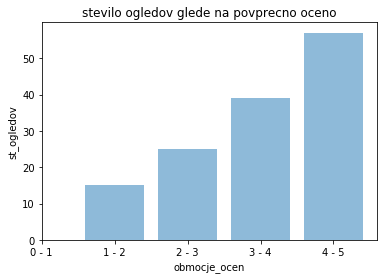

In [91]:
koncna = lepa[["title", "rating", "count"]]
prva = koncna[koncna["rating"] < 1]
druga = koncna[(koncna["rating"] > 1) & (koncna["rating"] < 2)]
tretja = koncna[(koncna["rating"] > 2) & (koncna["rating"] < 3)]
cetrta = koncna[(koncna["rating"] > 3) & (koncna["rating"] < 4)]
peta = koncna[koncna["rating"] > 4]

a = prva["count"].mean()
b = round(druga["count"].mean())
c = round(tretja["count"].mean())
d = round(cetrta["count"].mean())
e = round(peta["count"].mean())

print("filmi z oceno med 0 in 1 imajo v povprecju: " + str(a) + " ogledov.")
print("filmi z oceno med 1 in 2 imajo v povprecju: " + str(b) + " ogledov.")
print("filmi z oceno med 2 in 3 imajo v povprecju: " + str(c) + " ogledov.")
print("filmi z oceno med 3 in 4 imajo v povprecju: " + str(d) + " ogledov.")
print("filmi z oceno med 4 in 5 imajo v povprecju: " + str(e) + " ogledov.")

ranges = ('0 - 1', '1 - 2', '2 - 3', '3 - 4', '4 - 5')
y_pos = np.arange(len(ranges))
st_ocen = [a, b, c, d, e];
 
plt.bar(y_pos, st_ocen, align='center', alpha=0.5);
plt.xticks(y_pos, ranges);
plt.ylabel("st_ogledov");
plt.xlabel("obmocje_ocen");
plt.title("stevilo ogledov glede na povprecno oceno");
 
plt.show();


Odgovor: Iz grafa je razvidno da imajo filmi z boljso oceno tudi več ocen(ogledov). Problem sem rešil tako da sem zbral vse filme ki imajo povprečno oceno od 0 do 1, od 1 do 2, ... , od 4 do 5. Potem sem izračunal povprečno število ocen za vsako območje ocene in to prikazal na zgornjem grafu. Seveda sem tudi pri tem vprašanju upošteval, tako kot pri prvem, da morajo imeti filmi vsaj 10 ocen da jih lahko štejemo pod relevantne.

### 4. vprašanje (30%):
Vsaka ocena je bila vnešena na določen datum (stolpec
*timestamp*).  Ali se popularnost posameznih filmov s časom spreminja?
Problem reši tako, da za dani film ocene razporediš po času ter v vsaku časovni
točki izračunaš povprečje za zadnjih 30, 50, ali 100 ocen. Nariši graf, kako se
ocena spreminja in ga prikaži za dva zanimiva primera filmov.

In [92]:
god_father = with_title[with_title['title'] == 'Godfather, The (1972)']
god_father = god_father.sort_values(["timestamp"])
god_father


,userId,movieId,rating,timestamp,title,genres
14625,21,858,4.0,1997-01-21 13:45,"Godfather, The (1972)",Crime|Drama
14623,19,858,5.0,1997-02-06 02:11,"Godfather, The (1972)",Crime|Drama
14816,659,858,5.0,1997-04-07 08:42,"Godfather, The (1972)",Crime|Drama
14665,215,858,5.0,1997-04-09 06:23,"Godfather, The (1972)",Crime|Drama
14803,616,858,4.0,1997-04-09 10:05,"Godfather, The (1972)",Crime|Drama
14810,640,858,5.0,1997-04-13 19:11,"Godfather, The (1972)",Crime|Drama
14756,502,858,4.0,1997-04-17 20:37,"Godfather, The (1972)",Crime|Drama
14707,361,858,4.0,1997-05-19 16:17,"Godfather, The (1972)",Crime|Drama
14758,506,858,4.0,1997-06-04 05:38,"Godfather, The (1972)",Crime|Drama
14715,390,858,5.0,1997-06-23 15:35,"Godfather, The (1972)",Crime|Drama


Odgovor: Da, ocene so v povprečju vedno nižje.

### 5. vprašanje (20%):
Kako bi ocenili popularnost posameznih igralcev? Opišite postopek
ocenitve ter izpišite 10 najbolj popularnih igralcev.

In [ ]:
with_actors = pan.merge(with_title, cast_data, on="movieId")
with_actors.head(10)
a = with_actors.cast.str.split("|").tolist()

,userId,movieId,rating,timestamp,title,genres,cast
0,1,31,2.5,2009-12-14 03:52,Dangerous Minds (1995),Drama,Michelle Pfeiffer|George Dzundza|Robin Bartlet...
1,7,31,3.0,1996-12-29 15:12,Dangerous Minds (1995),Drama,Michelle Pfeiffer|George Dzundza|Robin Bartlet...
2,31,31,4.0,2010-05-11 03:39,Dangerous Minds (1995),Drama,Michelle Pfeiffer|George Dzundza|Robin Bartlet...
3,32,31,4.0,1996-06-15 10:47,Dangerous Minds (1995),Drama,Michelle Pfeiffer|George Dzundza|Robin Bartlet...
4,36,31,3.0,1996-11-03 22:40,Dangerous Minds (1995),Drama,Michelle Pfeiffer|George Dzundza|Robin Bartlet...
5,39,31,3.0,1996-05-19 18:59,Dangerous Minds (1995),Drama,Michelle Pfeiffer|George Dzundza|Robin Bartlet...
6,73,31,3.5,2009-10-15 09:31,Dangerous Minds (1995),Drama,Michelle Pfeiffer|George Dzundza|Robin Bartlet...
7,88,31,3.0,2009-04-15 02:32,Dangerous Minds (1995),Drama,Michelle Pfeiffer|George Dzundza|Robin Bartlet...
8,96,31,2.5,2008-10-06 03:25,Dangerous Minds (1995),Drama,Michelle Pfeiffer|George Dzundza|Robin Bartlet...
9,110,31,4.0,1996-08-15 11:18,Dangerous Minds (1995),Drama,Michelle Pfeiffer|George Dzundza|Robin Bartlet...


Odgovor: Stolpec z igralci zasedbo bi razdelili na posamezne igralce, jih zdruzil po imenu igralca in pogledal kateri igralec ima vec/boljše ocene.

### bonus vprašanje (5%):

Kateri je tvoj najljubši film? Zakaj?

Odgovor: Moj najljubši film je Shutter Island, saj ima dobro igralsko zasedbo(Leonardo DiCaprio), predvsem pa so mi zelo všeč misteriozni filmi pri katerih nikoli ne veš kaj se bo zgodilo, oziroma še boljše, kaj se dogaja. Prav tako imam najrajši pri filmih tako imenovan "plot-twist" in lahko recem da ima Shutter Island zame res najbolj nepričakovan konec.

## Zapiski
Za nalaganje podatkov lahko uporabite vgrajen modul `csv`. Mapa s podatki `ml-latest-small` se v tem primeru mora nahajati v isti mapi kot notebook.

In [8]:
from csv import DictReader

reader = DictReader(open('ml-latest-small/ratings.csv', 'rt', encoding='utf-8'))
for row in reader:
    user = row["userId"]
    movie = row["movieId"]
    rating = row["rating"]
    timestamp = row["timestamp"]

Podatki v zadnji vrstici datoteke:

In [9]:
user, movie, rating, timestamp

('671', '6565', '3.5', '1074784724')

Pretvorba časovnega formata (*Unix time*). Kode za oblikovanje so navedene v dokumentaciji modula [`datetime`](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior).

In [10]:
from datetime import datetime

t = 1217897793 # Unix-time
ts = datetime.fromtimestamp(t).strftime('%Y-%m-%d %H:%M')
ts

'2008-08-05 02:56'